In [2]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
using KernelDensity
include("../Inversion/Plot.jl")
include("../Inversion/GMVI.jl")
include("./Square-Map.jl")

Gaussian_mixture_VI (generic function with 1 method)

# 1-Parameter Square Map
The posterior distribution is studied  numerically on the following nonlinear 1-parameter problem:

$$
\begin{equation*}
y = \mathcal{G}(\theta) + \eta \qquad \mathcal{G}(\theta) = \theta^2. 
\end{equation*}
$$    


We assume the observation is $y = 1$ and the piror is $\mathcal{N}(3, 2^2)$, we consider the following cases

$$
\begin{align*}
&A: \eta \sim \mathcal{N}(0, 0.2^2)\\
&B: \eta \sim \mathcal{N}(0, 0.5^2)\\
&C: \eta \sim \mathcal{N}(0, 1^2)\\
&D: \eta \sim \mathcal{N}(0, 1.5^2)\\
\end{align*}
$$ 

# With Derivatives

[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("iter = ", 700, " / ", 1000)
[ Info: ("iter = ", 800, " / ", 1000)
[ Info: ("iter = ", 900, " / ", 1000)
[ Info: ("iter = ", 1000, " / ", 1000)
[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("iter = ", 700, " / ", 1000)
[ Info: ("iter = ", 800, " / ", 1000)
[ Info: ("iter = ", 900, " / ", 1000)
[ Info: ("iter = ", 1000, " / ", 1000)
[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("

[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("iter = ", 700, " / ", 1000)
[ Info: ("iter = ", 800, " / ", 1000)
[ Info: ("iter = ", 900, " / ", 1000)
[ Info: ("iter = ", 1000, " / ", 1000)


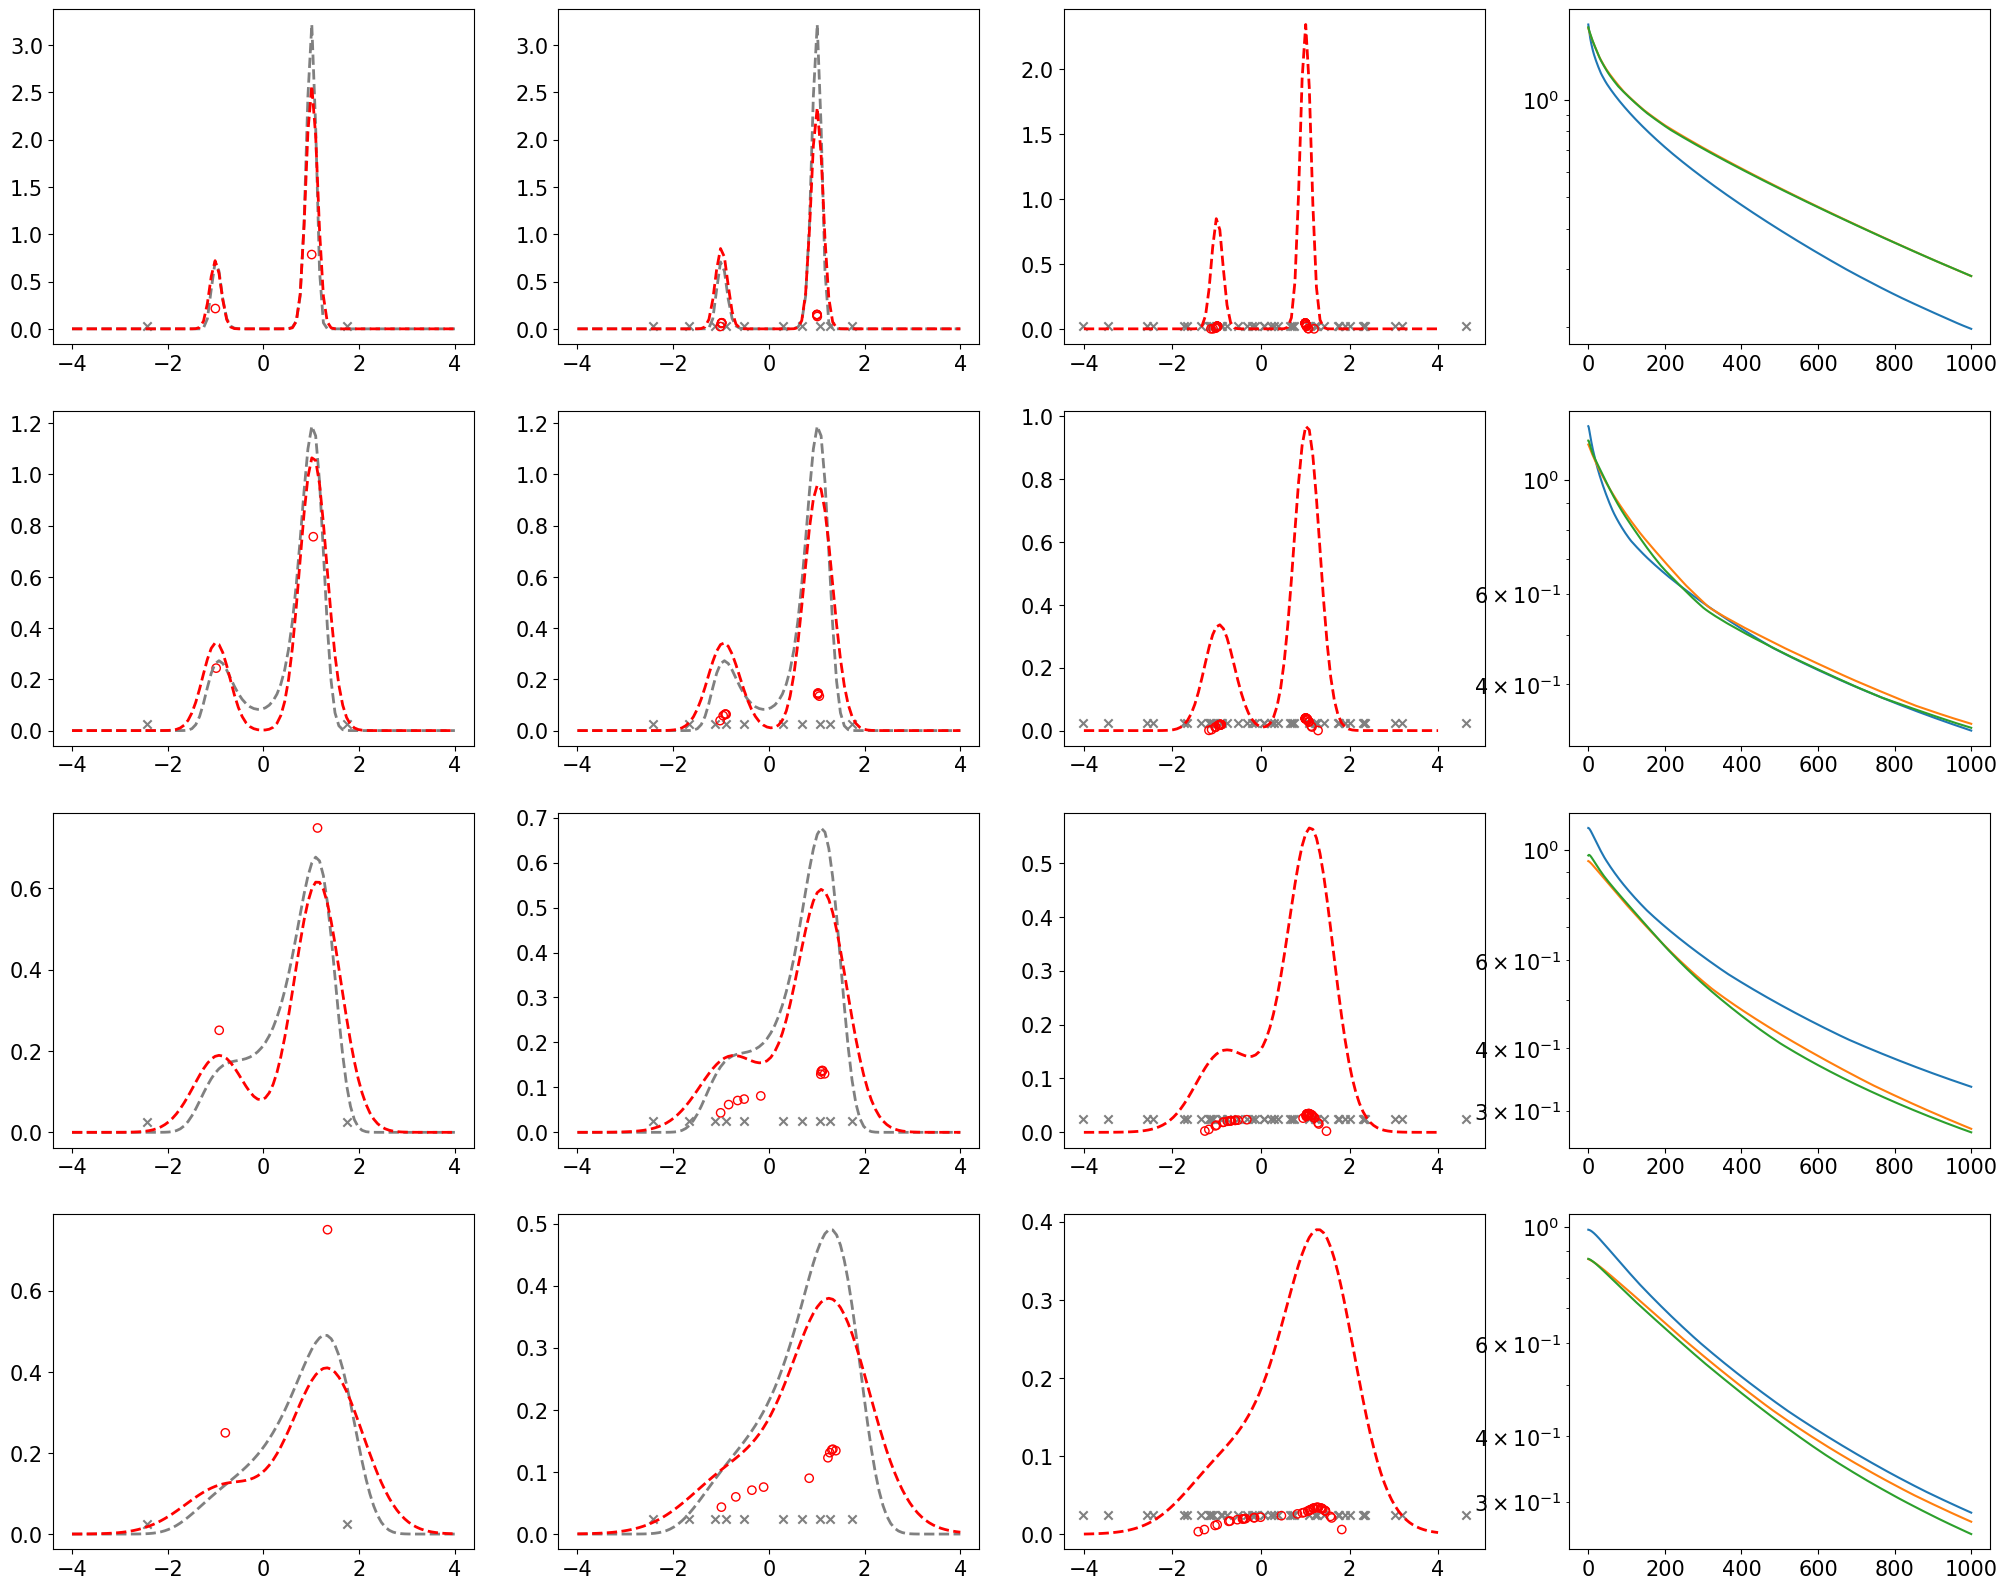

In [13]:
N_modes_array = [2; 10; 40]
fig, ax = PyPlot.subplots(nrows=4, ncols=length(N_modes_array)+1, sharex=false, sharey=false, figsize=(25,20))

    
Random.seed!(111);
N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, σ0 = 3.0, 2.0
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(Normal(0, σ0))
    xx0_cov[im, :, :] .= σ0^2
end


N_iter = 1000
Nx = 100
y = [1.0; 3.0]
dt = 1e-3

ση = [0.2; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[1,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)


ση = [0.5; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[2,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)


ση = [1.0; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[3,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)



ση = [2.0; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[4,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)

# fig.tight_layout()
# fig.savefig("DFGMGD.pdf")

# Random Sampling

In [ ]:
N_modes_array = [2; 10; 40]
fig, ax = PyPlot.subplots(nrows=5, ncols=length(N_modes_array)+1, sharex=false, sharey=false, figsize=(25,20))

    
Random.seed!(111);
N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, σ0 = 3.0, 2.0
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(Normal(0, σ0))
    xx0_cov[im, :, :] .= σ0^2
end
@info x0_mean

N_iter = 100
Nx = 100
y = [1.0; 3.0]
quadrature_type_GM = "random_sampling"
N_ens_GM = 1000
dt = 1e-3

ση = [0.2; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[1,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)


ση = [0.5; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[2,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)


ση = [1.0; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[3,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)



ση = [2.0; 2.0]
func_args = (y, ση)
func_F(x) = F(x, func_args)
func_dPhi(x) = dPhi(x, func_args)
objs = [Gaussian_mixture_VI(func_dPhi, nothing, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, quadrature_type_GM = quadrature_type_GM, N_ens_GM = N_ens_GM)[1] 
        for N_modes in N_modes_array]
visualization_1d(ax[4,:]; Nx = Nx, x_lim=[-4.0, 4.0], func_F=func_F, objs=objs)

# fig.tight_layout()
# fig.savefig("DFGMGD.pdf")

[ Info: [-2.4283140297584804; 1.7456283123426095; -0.894645096090581; 0.2906437638479689; -1.6739506493393108; -1.1302825060071122; 0.6935712151863443; 1.2689110758399453; 1.0765700107367757; -0.5294629063965713; 1.2286255729401245; 1.888404666526958; -1.1820278698524544; -1.1565112786553444; -1.0892903110609817; -1.7378812608703986; -0.8814644466483343; 3.031202438624696; 2.3527643464748262; -0.20843204345603042; 0.37625002883165437; 4.625266266358157; -0.7768116801787522; -2.577627153664709; 0.06163600909856056; 0.06112355864123673; 2.3053323165504085; 0.23492177715726334; -3.4444767955447713; -0.1416794678161199; 3.195802461216582; 2.3334894673888216; 1.4173378412112398; -0.3258329008328327; -4.023108250670748; 0.7455107628315424; -1.359552597503293; 0.661789724887017; 1.7705184917242267; 2.0012318851206143;;]
[ Info: ("iter = ", 10, " / ", 100)
[ Info: ("iter = ", 20, " / ", 100)
[ Info: ("iter = ", 30, " / ", 100)
[ Info: ("iter = ", 40, " / ", 100)
[ Info: ("iter = ", 50, " / ", 